In [3]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import datetime
import statsmodels.api as sm

[*********************100%***********************]  6 of 6 completed


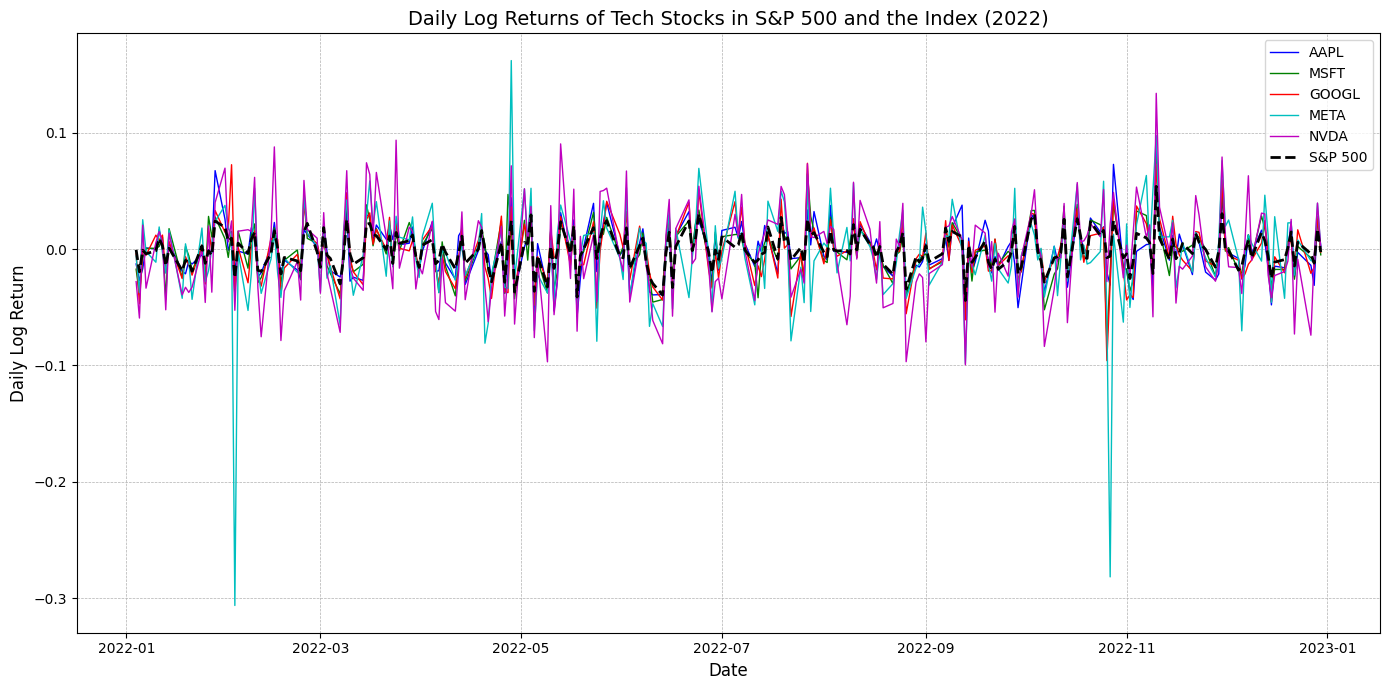

In [4]:
# List of tech stocks in the S&P 500 (first 5)
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'META', 'NVDA']
spx = '^GSPC'  # S&P 500 index symbol
# Fetch historical data for each stock and the index
data = yf.download(tech_stocks + [spx], start='2022-01-01', end='2022-12-31')['Adj Close']
# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()
# Plot the data
plt.figure(figsize=(14, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'k']  # Define a list of colors for the lines
for i, stock in enumerate(tech_stocks):
    plt.plot(log_returns[stock], label=stock, color=colors[i], linestyle='-', linewidth=1)
plt.plot(log_returns[spx], label='S&P 500', color='black', linestyle='--', linewidth=2)
# Customize the plot
plt.title('Daily Log Returns of Tech Stocks in S&P 500 and the Index (2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Log Return', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

Correlation: 0.9203693998765337


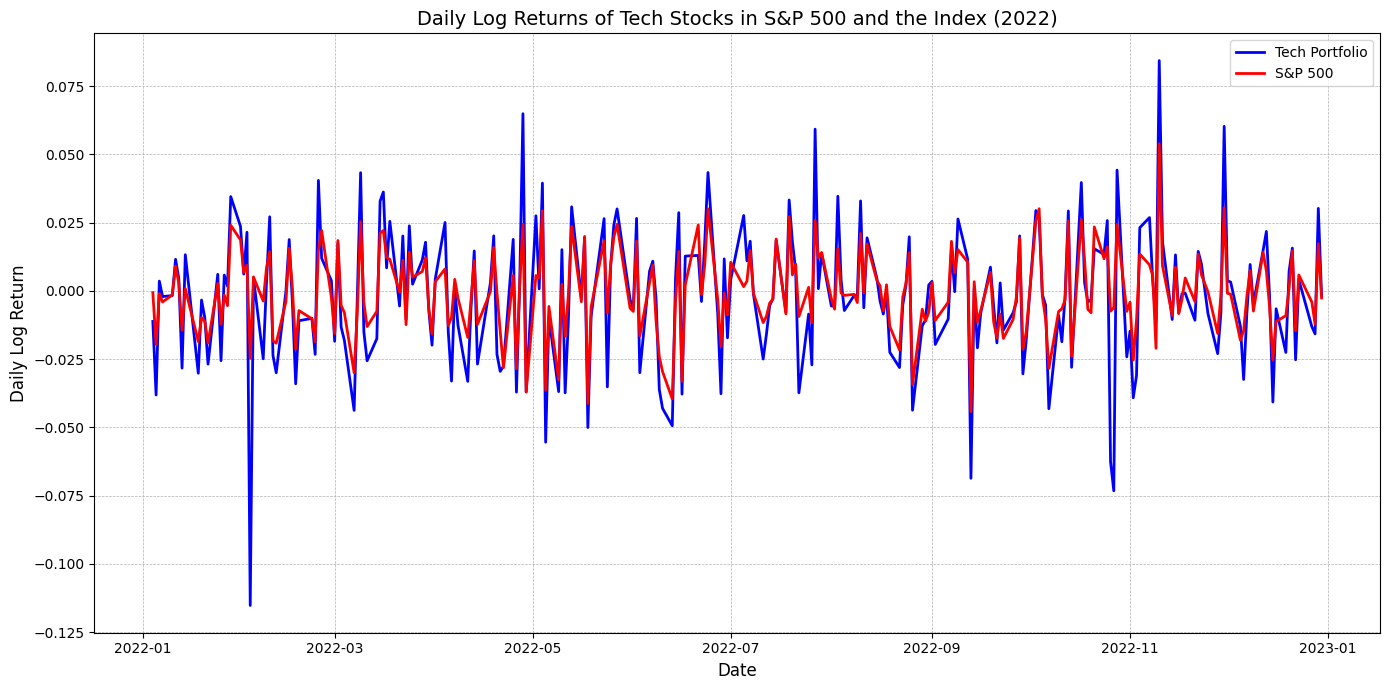

In [2]:
# Calculate the weighted average price of the 5 stocks (equal weighting)
weights = np.array([0.2] * 5)
portfolio = data[tech_stocks].dot(weights)
# Add the portfolio to the data DataFrame
data['Tech Portfolio'] = portfolio
# Calculate daily log returns
log_returns = np.log(data / data.shift(1)).dropna()
# Calculate correlation using stats library
portfolio_correlation, p_value = stats.pearsonr(data['Tech Portfolio'], data[spx])
print('Correlation:', portfolio_correlation)
# Plot the data
plt.figure(figsize=(14, 7))
colors = ['b', 'g', 'r', 'c', 'm', 'k']  # Define a list of colors for the lines
plt.plot(log_returns['Tech Portfolio'], label='Tech Portfolio', color='blue', linestyle='-', linewidth=2)
plt.plot(log_returns[spx], label='S&P 500', color='red', linestyle='-', linewidth=2)
# Customize the plot
plt.title('Daily Log Returns of Tech Stocks in S&P 500 and the Index (2022)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Daily Log Return', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

- Let $P_{\text{ETF}}(t)$ be the price of the ETF at time $t$.
- Let $P_i(t)$ be the price of the $i$-th component stock at time $t$.
- Let $w_i$ be the weight of the $i$-th component in the ETF.
$$P_{\text{components}}(t) = \sum_{i=1}^{N} w_i \cdot P_i(t)$$
- where $N$ is the number of component stocks.
$$D(t) = P_{\text{ETF}}(t) - P_{\text{components}}(t)$$

Define a threshold $\theta$ for significant deviation.
- **Long Signal**: If $D(t) < -\theta$, buy the ETF and sell the components.
- **Short Signal**: If $D(t) > \theta$, sell the ETF and buy the components.



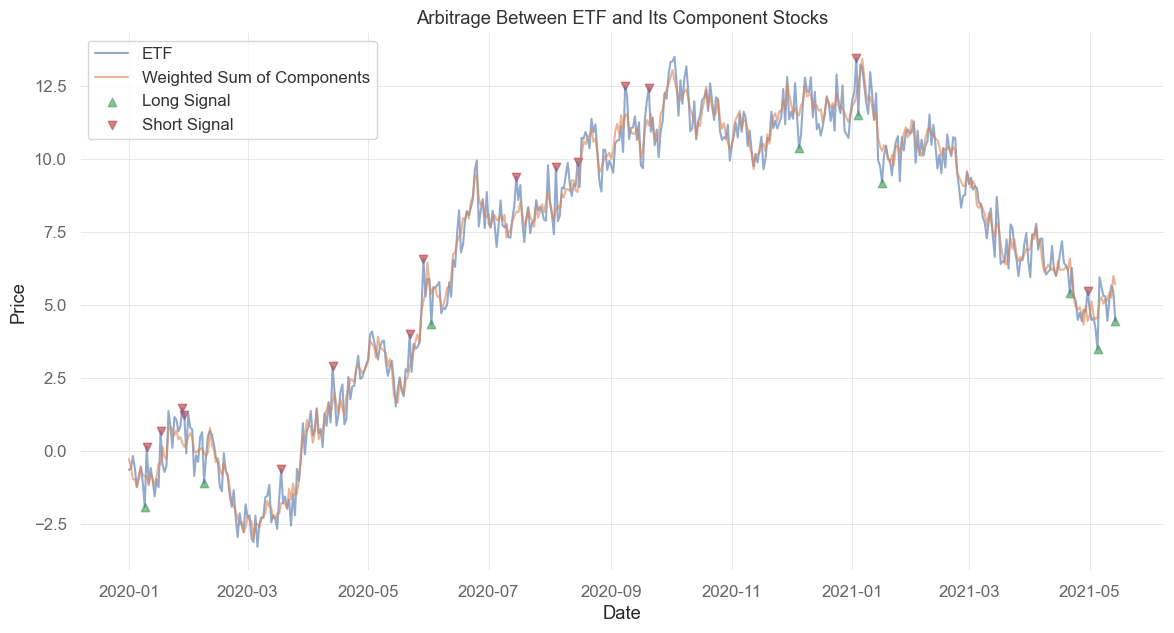

In [33]:
def calculate_weighted_sum(df_components, weights):
    return df_components.dot(weights)

def generate_signals(df_etf, df_components, weights, threshold):
    weighted_sum = calculate_weighted_sum(df_components, weights)
    deviation = df_etf - weighted_sum
    long_signals = deviation < -threshold
    short_signals = deviation > threshold
    return long_signals, short_signals, deviation

# Example usage
# Generate synthetic data for demonstration
np.random.seed(42)
dates = pd.date_range('2020-01-01', periods=500)
num_components = 10
weights = np.random.rand(num_components)
weights /= weights.sum()  # normalize weights
component_prices = np.cumsum(np.random.randn(500, num_components), axis=0)
etf_price = component_prices.dot(weights) + np.random.normal(0, 0.5, 500)  # ETF price with some noise

# Create DataFrame
df_components = pd.DataFrame(component_prices, index=dates, columns=[f'Component_{i}' for i in range(num_components)])
# Get df
df_etf = pd.Series(etf_price, index=dates, name='ETF')
# Define threshold
threshold = 1.0
# Generate signals
long_signals, short_signals, deviation = generate_signals(df_etf, df_components, weights, threshold)

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(df_etf.index, df_etf, label='ETF', alpha=0.6)
plt.plot(df_etf.index, calculate_weighted_sum(df_components, weights), label='Weighted Sum of Components', alpha=0.6)
plt.scatter(df_etf.index[long_signals], df_etf[long_signals], marker='^', color='g', alpha=0.7, label='Long Signal')
plt.scatter(df_etf.index[short_signals], df_etf[short_signals], marker='v', color='r', alpha=0.7, label='Short Signal')
plt.title('Arbitrage Between ETF and Its Component Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

